#### Decision Tree

**Exercise**
- Build decision tree model to predict survival based on certain parameters
- CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv
- In this file using following columns build a model to predict if person would survive or not: Pclass, Sex, Age, Fare
- Calculate score of your model

In [74]:
import pandas as pd

In [75]:
df = pd.read_csv('Dataset/titanic.csv')

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
df.shape

(891, 12)

In [78]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns', inplace = True)

In [79]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()

In [82]:
df.Sex = le.fit_transform(df.Sex)

In [83]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [84]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [85]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [86]:
import math

In [87]:
df.Age = df.Age.fillna(round(df.Age.mean()))

In [88]:
X = df.drop('Survived', axis = 'columns')

In [89]:
y = df.Survived

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
clf = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')

In [94]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [95]:
y_pred = clf.predict(X_test)

In [96]:
clf.score(X_test,y_test)

0.7877094972067039

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
cm = confusion_matrix(y_test, y_pred)

In [99]:
cm

array([[93, 17],
       [21, 48]], dtype=int64)

In [100]:
import seaborn as sn
from matplotlib import pyplot as plt

Text(83.22222222222221, 0.5, 'Truth')

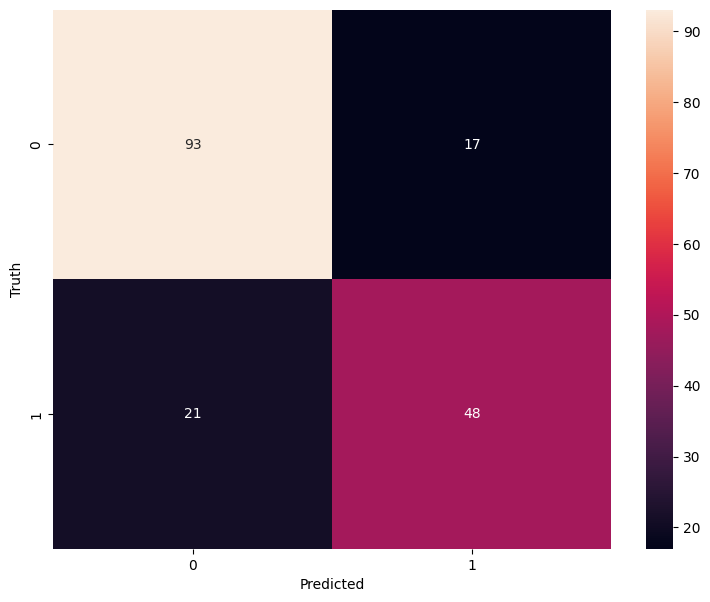

In [101]:
plt.figure(figsize = (9,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')